<a href="https://colab.research.google.com/github/Sumithra0103/Web-for/blob/main/Wine_Quality_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
    print(f'User uploaded file "{fn}" with length {len(uploaded[fn])} bytes')


--- DATASET HEAD ---
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5 

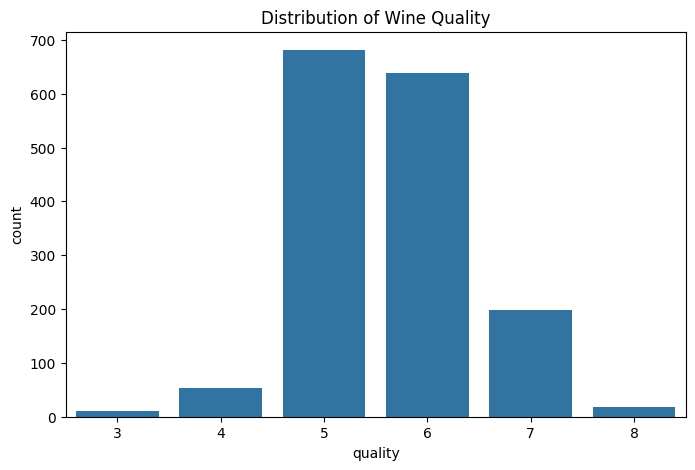


--- BINARY TARGET DISTRIBUTION ---
quality_label
0    1382
1     217
Name: count, dtype: int64

--- MODEL ACCURACIES ---
Logistic Regression: 0.87
KNN: 0.88
Decision Tree: 0.87
Random Forest: 0.90
SVM: 0.88

--- MODEL COMPARISON ---
                 Model  Accuracy
3        Random Forest  0.900000
1                  KNN  0.881250
4                  SVM  0.875000
2        Decision Tree  0.871875
0  Logistic Regression  0.865625

--- GRID SEARCH RESULTS ---
Best Parameters: {'svm__C': 10, 'svm__kernel': 'rbf'}
Best Cross-Validation Accuracy: 0.894


In [ ]:

# WINE QUALITY PREDICTION PROJECT

# task 1
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# task 2
df = pd.read_csv('/content/winequality.csv')

print("\n--- DATASET HEAD ---")
print(df.head())

print("\n--- DATASET TAIL ---")
print(df.tail())

print("\n--- RANDOM SAMPLE ---")
print(df.sample(5))

# task 3
print("\n--- DATASET SHAPE ---")
print(df.shape)

print("\n--- DATA TYPES ---")
print(df.dtypes)

print("\n--- SUMMARY STATISTICS ---")
print(df.describe())

# task 4
print("\n--- MISSING VALUES ---")
print(df.isnull().sum())

# task 5
print("\n--- QUALITY VALUE COUNTS ---")
print(df["quality"].value_counts().sort_index())

plt.figure(figsize=(8,5))
sns.countplot(x="quality", data=df)
plt.title("Distribution of Wine Quality")
plt.show()


# task 6
df["quality_label"] = np.where(df["quality"] >= 7, 1, 0)

print("\n--- BINARY TARGET DISTRIBUTION ---")
print(df["quality_label"].value_counts())

#task 7
X = df.drop(["quality", "quality_label"], axis=1)
y = df["quality_label"]

#task 8
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# task 9
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#task 10
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC()
}

accuracies = {}

models["Logistic Regression"].fit(X_train_scaled, y_train)
accuracies["Logistic Regression"] = accuracy_score(
    y_test, models["Logistic Regression"].predict(X_test_scaled)
)

models["KNN"].fit(X_train_scaled, y_train)
accuracies["KNN"] = accuracy_score(
    y_test, models["KNN"].predict(X_test_scaled)
)

models["Decision Tree"].fit(X_train, y_train)
accuracies["Decision Tree"] = accuracy_score(
    y_test, models["Decision Tree"].predict(X_test)
)

models["Random Forest"].fit(X_train, y_train)
accuracies["Random Forest"] = accuracy_score(
    y_test, models["Random Forest"].predict(X_test)
)

models["SVM"].fit(X_train_scaled, y_train)
accuracies["SVM"] = accuracy_score(
    y_test, models["SVM"].predict(X_test_scaled)
)

print("\n--- MODEL ACCURACIES ---")
for model, acc in accuracies.items():
    print(f"{model}: {acc:.2f}")

#task 11
results_df = pd.DataFrame(
    accuracies.items(), columns=["Model", "Accuracy"]
).sort_values(by="Accuracy", ascending=False)

print("\n--- MODEL COMPARISON ---")
print(results_df)

#task 12
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC())
])

param_grid = {
    "svm__C": [0.1, 1, 10],
    "svm__kernel": ["linear", "rbf"]
}

grid = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring="accuracy"
)

grid.fit(X_train, y_train)

print("\n--- GRID SEARCH RESULTS ---")
print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Accuracy:", round(grid.best_score_, 3))


